### Частина перша: Знайомство з Pandas

**Завдання:**

1. Прочитайте дані з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" за [посиланням](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C) за допомогою методу `read_html`.
2. Виведіть перші 5 рядків таблиці за допомогою методу `head`.
3. Визначте кількість рядків і стовпців в датафреймі (атрибут `shape`).
4. Замініть в таблиці значення "—" на значення NaN.
5. Визначте типи всіх стовпців за допомогою `dataframe.dtypes`.
6. Замініть типы нечислових колонок на числові. Підказка: це колонки, де знаходився символ "-".
7. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` і `sum`).
8. Видаліть з таблиці дані по всій країні (остання строка таблиці).
9. Замініть відсутні дані в стовпцях середніми значеннями по цим стовпцям (метод `fillna`).
10. Отримайте список регіонів, де рівень народжуваності в 2019 році був вище середнього по Україні.
11. В якому регіоні була найвища народжуваність в 2014 році?
12. Побудуйте стовбчасту діаграму народжуваності по регіонах в 2019 році.

In [198]:
# Завдання 1
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Отримуємо HTML-код сторінки
response = requests.get("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C")
html_content = response.content

# Створюємо об'єкт BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Знаходимо всі таблиці на сторінці
tables = soup.find_all("table", {"class": "wikitable"})

# Вибираємо потрібну таблицю (під номером 6) та отримуємо її рядки
rows = tables[6].find_all("tr")

# Створюємо порожній список для збереження рядків таблиці
table_data = []

# Перебираємо рядки таблиці, обробляємо дані та зберігаємо їх у список
for row in rows:
    # Отримуємо всі комірки в поточному рядку
    cells = row.find_all(["th", "td"])
    
    # Перетворюємо текст кожної комірки, виправляючи числа
    row_data = []
    for cell in cells:
        if cell.text.strip() == "—":
            row_data.append(cell.text.strip())
        else:
            # Виправляємо числа, зсуваючи кому вліво на одне значення
            row_data.append(cell.text.strip().replace(",", ".", 1))

    # Додаємо оброблений рядок до загального списку даних
    table_data.append(row_data)

# Створюємо DataFrame з обробленими даними
df = pd.DataFrame(table_data[1:], columns=table_data[0])

# Виводимо зчитану таблицю для перевірки
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [199]:
# Завдання 2
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [200]:
# Завдання 3
print("Кількість рядків і стовпців у датафреймі:", df.shape)

Кількість рядків і стовпців у датафреймі: (28, 9)


In [204]:
# Завдання 4
# Створюємо DataFrame з обробленими даними
df = pd.DataFrame(table_data[1:], columns=table_data[0])

# Збереження назв регіонів перед заміною "—" на NaN
regions = df["Регіон"]

# Заміна "—" на NaN
df.replace("—", float("NaN"), inplace=True)

# Повернення назв регіонів
df["Регіон"] = regions

In [209]:
# Завдання 5
print("Типи всіх стовпців:")
df["Регіон"] = regions
print(df.dtypes)

Типи всіх стовпців:
Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object


In [210]:
# Завдання 6
non_numeric_columns = df.columns[df.dtypes == object]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

In [211]:
# Завдання 7
df["Регіон"] = regions
missing_values_ratio = df.isnull().sum() / len(df)
print("Частка пропусків в кожній колонці:")
print(missing_values_ratio)

Частка пропусків в кожній колонці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [212]:
# Завдання 8
df.drop(df.tail(1).index, inplace=True)
regions.drop(regions.tail(1).index, inplace=True)

In [235]:
# Завдання 9
# Заміна відсутніх значень середніми
non_numeric_columns = df.columns[df.dtypes == object]
numeric_columns = df.columns[df.dtypes != object]

# Заміна відсутніх значень середніми для числових стовпців
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Заміна відсутніх значень середніми для нечислових стовпців
df.fillna(df[numeric_columns].mean(), inplace=True)

In [236]:
# Завдання 10
# Отримання регіонів з вищим рівнем народжуваності в 2019 році
df["Регіон"] = regions
regions_above_avg = df[df['2019'] > df['2019'].mean()]['Регіон']
print("Регіони з вищим рівнем народжуваності в 2019 році:")
print(regions_above_avg)

Регіони з вищим рівнем народжуваності в 2019 році:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [237]:
# Завдання 11
# Знайдемо регіон з найвищою народжуваністю в 2014 році
df["Регіон"] = regions
region_highest_birthrate_2014 = df[df['2014'] == df['2014'].max()]['Регіон'].iloc[0]
print("Регіон з найвищою народжуваністю в 2014 році:", region_highest_birthrate_2014)

Регіон з найвищою народжуваністю в 2014 році: Рівненська


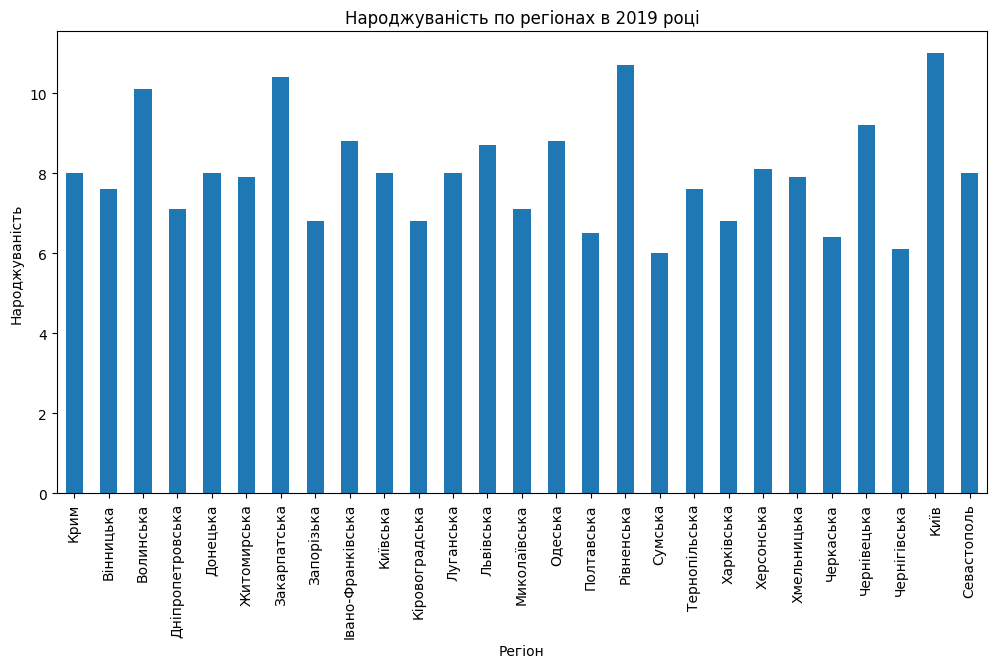

In [238]:
# Завдання 12
import matplotlib.pyplot as plt

# Відфільтруємо дані для побудови діаграми
data_for_plot = df[['Регіон', '2019']].copy()

# Видалимо рядок з даними по всій країні
data_for_plot = data_for_plot.drop(data_for_plot[data_for_plot['Регіон'] == 'Україна'].index)

# Побудова стовбчастої діаграми
data_for_plot.plot(kind='bar', x='Регіон', y='2019', figsize=(12, 6), legend=False)
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90)
plt.show()